In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# /content/drive/MyDrive/SHAREs/HKIT/turtle.png

# /content/drive/MyDrive

### Google Colab에서 사용시

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_matplotlib_image(bgrImage):
    img_dst = cv2.cvtColor(bgrImage, cv2.COLOR_BGR2RGB)
    plt.figure(figsize = (4,4))
    plt.axis('off')
    plt.imshow(img_dst)
    plt.show()

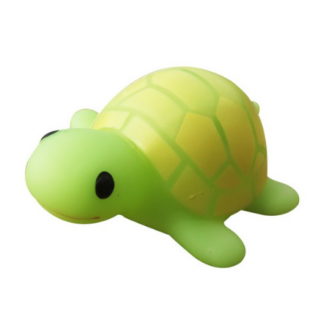

In [13]:
img_src = cv2.imread('/content/drive/MyDrive/SHAREs/HKIT/turtle.png', cv2.IMREAD_COLOR)
height,width = img_src.shape[:2]
show_matplotlib_image(img_src)

### Local Computer 에서 사용시

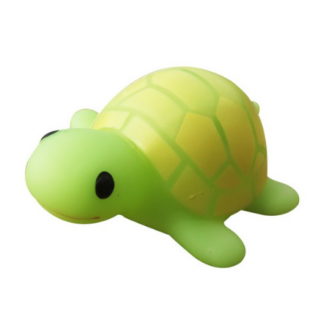

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_src = cv2.imread('turtle.png', cv2.IMREAD_COLOR) # opecv BGR
show_matplotlib_image(img_src)

In [1]:
import cv2
import numpy as np

img_src = cv2.imread('turtle.png', cv2.IMREAD_COLOR)

if img_src is None:
    print("이미지를 불러올 수 없습니다.")
    exit(0)

cv2.imshow("result",img_src)
cv2.waitKey()
cv2.destroyAllWindows()

### 이미지 로딩 기본 서식

In [2]:
import cv2

img_src = cv2.imread('turtle.png', cv2.IMREAD_COLOR)
height, width = img_src.shape[:2]

cv2.imshow("src",img_src)

cv2.waitKey()
cv2.destroyAllWindows()

### 동영상 로딩 기본 서식

In [ ]:
import cv2

capture = cv2.VideoCapture('images/video.mp4')
# 보통 1초 = 1000ms , 동영상은 초당 30 frame
while True:
    ret, frame = capture.read()
    if ret == False:
        print('동영상 종료')
        break
    cv2.imshow("video", frame)
    key = cv2.waitKey(10)
    if key == 27: # Esc키
        break;

capture.release()
cv2.destroyAllWindows()

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_matplotlib_image(bgrImage):
    img_dst = cv2.cvtColor(bgrImage, cv2.COLOR_BGR2RGB)
    plt.figure(figsize = (4,4))
    plt.axis('off')
    plt.imshow(img_dst)
    plt.show()

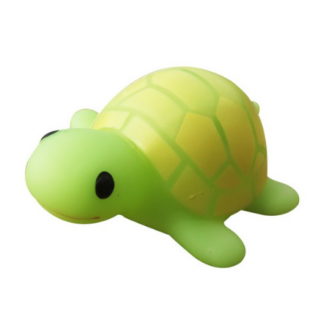

In [3]:
img_src = cv2.imread('turtle.png',cv2.IMREAD_COLOR)
height,width = img_src.shape[:2]
show_matplotlib_image(img_src)

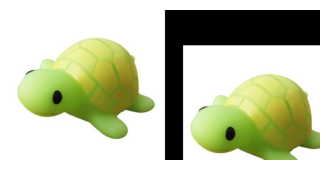

In [9]:
# M : 이동할 행렬 x방향 100pixel, y방향 200pixel 이동
M = np.array([[1,0,50],[0,1,100],[0,0,1]])
img_dst = np.zeros(img_src.shape, dtype=np.uint8)

for y in range(height):
    for x in range(width):
        p = np.array([x,y,1])
        p_ = np.dot(M,p)  #행렬변환한 점의 좌표 _p
        
        x_,y_ = p_[:2]
        x_ = int(x_)
        y_ = int(y_)
        
        if(x_ >= 0 and x_ < width and y_ >= 0 and y_ < height):
            img_dst[y_,x_]= img_src[y,x]
            
# img_result = np.concatenate((img_src, img_dst), axis=1)
img_result = cv2.hconcat([img_src,img_dst])
show_matplotlib_image(img_result)

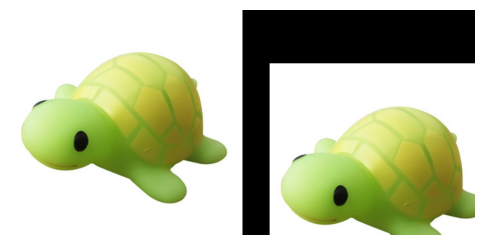

In [18]:
def show_matplotlib_image(bgrImage, row_size, col_size):
    img_dst = cv2.cvtColor(bgrImage, cv2.COLOR_BGR2RGB)
    plt.figure(figsize = (row_size,col_size))
    plt.axis('off')
    plt.imshow(img_dst)
    plt.show()

img_src = cv2.imread('turtle.png',cv2.IMREAD_COLOR)
height,width = img_src.shape[:2]
# M : 이동할 행렬 x방향 100pixel, y방향 200pixel 이동
M = np.array([[1,0,50],[0,1,100]]).astype(np.float32)
img_dst = cv2.warpAffine(img_src,M,(0,0))
img_result = cv2.hconcat([img_src,img_dst])
show_matplotlib_image(img_result, 6,4)

### 회전

In [1]:
import cv2
import numpy as np

img_src = cv2.imread('images/turtle.png', cv2.IMREAD_COLOR)
height,width = img_src.shape[:2]
rows,cols = img_src.shape[:2]
##################################
angle = 30
radian = angle*np.pi/180
c = np.cos(radian)
s = np.sin(radian)

rotation_matrix = np.array([[c,s,0],[-s,c,0],[0,0,1]], dtype=float)
img_dst = np.zeros_like(img_src)  # 원래이미지와 똑같은 형태로 0의 값을 넣은 매트릭스
inv_rot_matrix = np.linalg.inv(rotation_matrix)

for y in range(rows):
    for x in range(cols):
        new_p = np.array([x,y,1])
        old_p = np.dot(inv_rot_matrix, new_p)
        x_ = int(old_p[0])
        y_ = int(old_p[1])
        if(x_>=0 and x_<width and y_ >=0 and y_ <height) :
            img_dst[y,x] = img_src[y_,x_]

img_dst = cv2.hconcat([img_src,img_dst])
##################################
cv2.imshow("result",img_dst)
cv2.waitKey()
cv2.destroyAllWindows()

- matplotlib 사용 버전

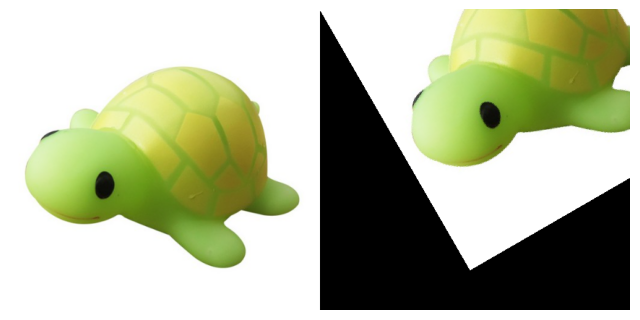

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_matplotlib_image(bgrImage, row_size=8, col_size=4):
    img_dst = cv2.cvtColor(bgrImage, cv2.COLOR_BGR2RGB)
    plt.figure(figsize = (row_size,col_size))
    plt.axis('off')
    plt.imshow(img_dst)
    plt.show()

img_src = cv2.imread('images/turtle.png', cv2.IMREAD_COLOR)
height,width = img_src.shape[:2]
rows,cols = img_src.shape[:2]
##################################
angle = 30
radian = angle*np.pi/180
c = np.cos(radian)
s = np.sin(radian)

rotation_matrix = np.array([[c,s,0],[-s,c,0],[0,0,1]], dtype=float)
img_dst = np.zeros_like(img_src)  # 원래이미지와 똑같은 형태로 0의 값을 넣은 매트릭스
inv_rot_matrix = np.linalg.inv(rotation_matrix)

# x,y : dst image  // x_ ,y_ : source image
for y in range(rows):
    for x in range(cols):
        new_p = np.array([x,y,1])
        old_p = np.dot(inv_rot_matrix, new_p)
        x_ = int(old_p[0])
        y_ = int(old_p[1])
        if(x_>=0 and x_<width and y_ >=0 and y_ <height) :  # 원래 이미지 영역안에 들어가면 가져오기
            img_dst[y,x] = img_src[y_,x_]

img_dst = cv2.hconcat([img_src,img_dst])
##################################
show_matplotlib_image(img_dst)

### OpenCV 함수 사용하여 이미지 회전
- rotation_matrix = cv2.getRotationMatrix2D((cols, rows), angle, 1)

In [4]:
import cv2
import numpy as np

img_src = cv2.imread('images/turtle.png', cv2.IMREAD_COLOR)
height,width = img_src.shape[:2]
##################################
angle = 30
center = (int(width/2),int(height/2))

rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)
img_dst = cv2.warpAffine(img_src, rotation_matrix, (width,height))


img_dst = cv2.hconcat([img_src,img_dst])
##################################
cv2.imshow("result",img_dst)
cv2.waitKey()
cv2.destroyAllWindows()

- matplotlib 사용 버전

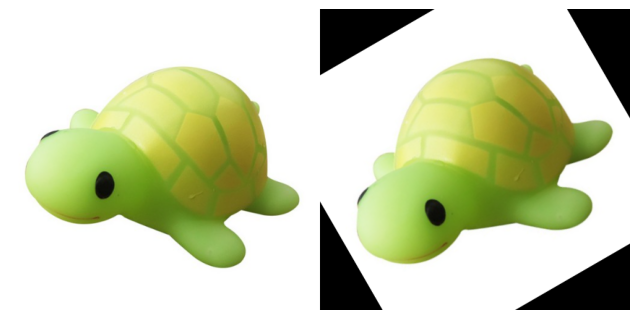

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_matplotlib_image(bgrImage, row_size=8, col_size=4):
    img_dst = cv2.cvtColor(bgrImage, cv2.COLOR_BGR2RGB)
    plt.figure(figsize = (row_size,col_size))
    plt.axis('off')
    plt.imshow(img_dst)
    plt.show()
    
img_src = cv2.imread('images/turtle.png', cv2.IMREAD_COLOR)
height,width = img_src.shape[:2]
##################################
angle = 30
center = (int(width/2),int(height/2))

rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)
img_dst = cv2.warpAffine(img_src, rotation_matrix, (width,height))


img_dst = cv2.hconcat([img_src,img_dst])    
##################################
show_matplotlib_image(img_dst)

### 스캐일 변환

In [11]:
import cv2
import numpy as np

img_src = cv2.imread('images/turtle.png',cv2.IMREAD_COLOR)
height,width = img_src.shape[:2]
########################################
scale = 0.3
scale_matrix = np.array([[scale,0,0],
                         [0,scale,0],
                         [0,0,1]], dtype=float)

img_dst = np.zeros_like(img_src) # np.ones_like(img_src)*255
inv_scale_matrix = np.linalg.inv(scale_matrix)

for y in range(height):
    for x in range(width):
        new_p = np.array([x,y,1])
        olp_p = np.dot(inv_scale_matrix,new_p)
        x_ = int(olp_p[0])
        y_ = int(olp_p[1])
        if (x_ >= 0 and x_ < width and y_ >= 0 and y_ < height):
            img_dst.itemset((y, x, 0), img_src.item(y_, x_, 0))
            img_dst.itemset((y, x, 1), img_src.item(y_, x_, 1))
            img_dst.itemset((y, x, 2), img_src.item(y_, x_, 2))

img_dst = cv2.hconcat([img_src,img_dst])  
#########################################
cv2.imshow('result',img_dst)
cv2.waitKey()
cv2.destroyAllWindows()

- matplotlib 적용

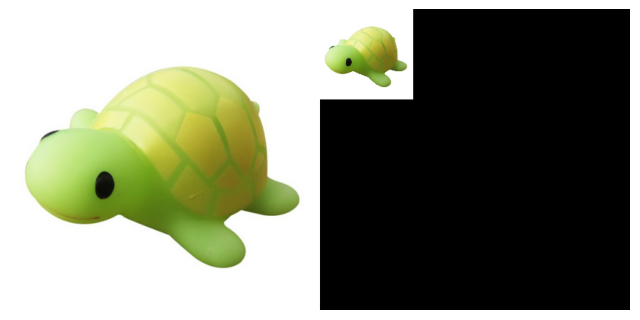

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_matplotlib_image(bgrImage, row_size=8, col_size=4):
    img_dst = cv2.cvtColor(bgrImage, cv2.COLOR_BGR2RGB)
    plt.figure(figsize = (row_size,col_size))
    plt.axis('off')
    plt.imshow(img_dst)
    plt.show()

img_src = cv2.imread('images/turtle.png',cv2.IMREAD_COLOR)
height,width = img_src.shape[:2]
########################################
scale = 0.3
scale_matrix = np.array([[scale,0,0],
                         [0,scale,0],
                         [0,0,1]], dtype=float)

img_dst = np.zeros_like(img_src) # np.ones_like(img_src)*255
inv_scale_matrix = np.linalg.inv(scale_matrix)

for y in range(height):
    for x in range(width):
        new_p = np.array([x,y,1])
        olp_p = np.dot(inv_scale_matrix,new_p)
        x_ = int(olp_p[0])
        y_ = int(olp_p[1])
        if (x_ >= 0 and x_ < width and y_ >= 0 and y_ < height):
            img_dst.itemset((y, x, 0), img_src.item(y_, x_, 0))
            img_dst.itemset((y, x, 1), img_src.item(y_, x_, 1))
            img_dst.itemset((y, x, 2), img_src.item(y_, x_, 2))

img_dst = cv2.hconcat([img_src,img_dst])    
##################################
show_matplotlib_image(img_dst)

### OpenCV 변환

In [ ]:
import cv2
import numpy as np

img_src = cv2.imread('images/turtle.png',cv2.IMREAD_COLOR)
height,width = img_src.shape[:2]
########################################
scale = 0.3
tar_width = int(width*scale) ; tar_height = int(height*scale)
img_dst = cv2.resize(img_src, (tar_width,tar_height))

if scale > 1.0:
    img_dst = cv2.hconcat([img_src, img_dst[:height, :width, :]])
elif scale > 0.0:
    h1, w1 = img_dst.shape[:2]
    img_zero = np.zeros_like(img_src)
    img_zero[:h1,:w1,:] = img_dst
    img_dst = cv2.hconcat([img_src, img_zero])

#########################################
cv2.imshow('result',img_dst)
cv2.waitKey()
cv2.destroyAllWindows()

- matplotlib 적용

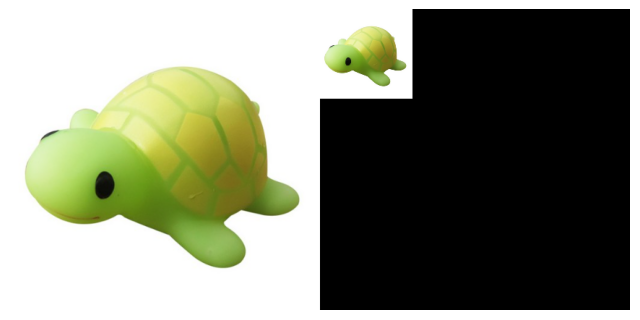

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_matplotlib_image(bgrImage, row_size=8, col_size=4):
    img_dst = cv2.cvtColor(bgrImage, cv2.COLOR_BGR2RGB)
    plt.figure(figsize = (row_size,col_size))
    plt.axis('off')
    plt.imshow(img_dst)
    plt.show()

img_src = cv2.imread('images/turtle.png',cv2.IMREAD_COLOR)
height,width = img_src.shape[:2]
########################################
scale = 0.3
tar_width = int(width*scale) ; tar_height = int(height*scale)
img_dst = cv2.resize(img_src, (tar_width,tar_height))

if scale > 1.0:
    img_dst = cv2.hconcat([img_src, img_dst[:height, :width, :]])
elif scale > 0.0:
    h1, w1 = img_dst.shape[:2]
    img_zero = np.zeros_like(img_src)
    img_zero[:h1,:w1,:] = img_dst
    img_dst = cv2.hconcat([img_src, img_zero])

##################################
show_matplotlib_image(img_dst)

### 결합된 변환
- 크기를 0.7로 줄임
- 이동 (0.25h , 0.25w)
- 45도 회전

In [16]:
import cv2
import numpy as np

img_src = cv2.imread('images/turtle.png', cv2.IMREAD_COLOR)
height, width = img_src.shape[:2]

scale_factor = 0.5
scaling_matrix = np.array([[scale_factor, 0, 0], [0, scale_factor, 0], [0, 0, 1]])
translation_matrix = np.array([[1, 0, width / 4], [0, 1, height / 4], [0, 0, 1]])

angle = 45
radian = angle * np.pi / 180
c = np.cos(radian)
s = np.sin(radian)

center_x = width / 2
center_y = height / 2
rotation_matrix = np.array(
    [[c, s, (1 - c) * center_x - s * center_y], [-s, c, s * center_x + (1 - c) * center_y], [0, 0, 1]])

# 정해진 순서대로 변환 행렬을 곱하여 하나의 행렬을 생성합니다.
T = np.eye(3)
T = np.dot(scaling_matrix, T)
T = np.dot(translation_matrix, T)
T = np.dot(rotation_matrix, T)

inv_scaling_matrix = np.linalg.inv(T)
img_dst = np.zeros((height, width, img_src.shape[2]), dtype=np.uint8)

for y in range(height):
    for x in range(width):

        # 미리 구해놓은 변환행렬을 행렬곱 한번으로 적용합니다.
        # 여기에서도 backward mapping을 사용합니다.
        new_p = np.array([x, y, 1])
        old_p = np.dot(inv_scaling_matrix, new_p)
        x_ = int(old_p[0])
        y_ = int(old_p[1])

        if x_ >= 0 and x_ < width and y_ >= 0 and y_ < height:
            img_dst.itemset((y, x, 0), img_src.item(y_, x_, 0))
            img_dst.itemset((y, x, 1), img_src.item(y_, x_, 1))
            img_dst.itemset((y, x, 2), img_src.item(y_, x_, 2))

img_dst = cv2.hconcat([img_src,img_dst])

cv2.imshow("result", img_dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

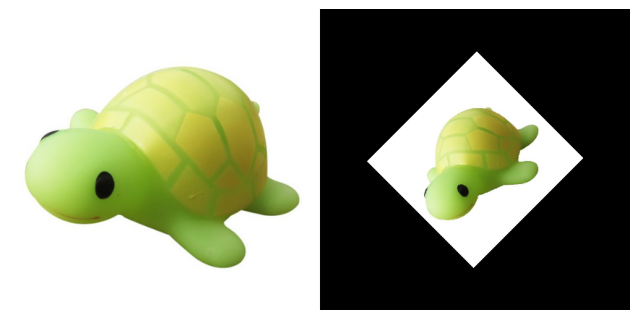

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_matplotlib_image(bgrImage, row_size=8, col_size=4):
    img_dst = cv2.cvtColor(bgrImage, cv2.COLOR_BGR2RGB)
    plt.figure(figsize = (row_size,col_size))
    plt.axis('off')
    plt.imshow(img_dst)
    plt.show()

img_src = cv2.imread('images/turtle.png', cv2.IMREAD_COLOR)
height, width = img_src.shape[:2]

scale_factor = 0.5
scaling_matrix = np.array([[scale_factor, 0, 0], [0, scale_factor, 0], [0, 0, 1]])
translation_matrix = np.array([[1, 0, width / 4], [0, 1, height / 4], [0, 0, 1]])

angle = 45
radian = angle * np.pi / 180
c = np.cos(radian)
s = np.sin(radian)

center_x = width / 2
center_y = height / 2
rotation_matrix = np.array(
    [[c, s, (1 - c) * center_x - s * center_y], [-s, c, s * center_x + (1 - c) * center_y], [0, 0, 1]])

# 정해진 순서대로 변환 행렬을 곱하여 하나의 행렬을 생성합니다.
T = np.eye(3)
T = np.dot(scaling_matrix, T)
T = np.dot(translation_matrix, T)
T = np.dot(rotation_matrix, T)

inv_scaling_matrix = np.linalg.inv(T)
img_dst = np.zeros((height, width, img_src.shape[2]), dtype=np.uint8)

for y in range(height):
    for x in range(width):

        # 미리 구해놓은 변환행렬을 행렬곱 한번으로 적용합니다.
        # 여기에서도 backward mapping을 사용합니다.
        new_p = np.array([x, y, 1])
        old_p = np.dot(inv_scaling_matrix, new_p)
        x_ = int(old_p[0])
        y_ = int(old_p[1])

        if x_ >= 0 and x_ < width and y_ >= 0 and y_ < height:
            img_dst.itemset((y, x, 0), img_src.item(y_, x_, 0))
            img_dst.itemset((y, x, 1), img_src.item(y_, x_, 1))
            img_dst.itemset((y, x, 2), img_src.item(y_, x_, 2))

img_dst = cv2.hconcat([img_src,img_dst])
##################################
show_matplotlib_image(img_dst)


### 실습내용
#####  크기를 임의로 설정하더라도 화면의 가운데 출력되어야함
- scale설정 
- 이동 (0.??h, 0.??w)
- 45도 회전
- matplotlib로 화면 아래 출력